In [1]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import math as math
import helpers
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
players = pd.read_csv(r'player_data_selected.csv')
players

,Unnamed: 0,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category
0,0,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
1,1,2008,Kaká,25,90,91,Milan,138449,182.9,161,Right,90,CAM,1,0,0,0,334,87,90,64,93,NaN,353,91,NaN,80,90,92,271,93,89,NaN,89,NaN,330,86,NaN,78,73,93,288,38,87,86,NaN,77,NaN,51,22,29,NaN,70,4,22,90,22,22,1697,470,4,1,NaN,NaN,4,91,89,89,91,42,68,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder
2,2,2008,Diego,22,88,90,SV Werder Bremen,136138,172.7,161,Right,88,CAM,2,0,0,0,316,84,85,55,92,NaN,350,90,NaN,83,84,93,252,86,83,NaN,83,NaN,301,82,NaN,78,62,79,298,64,80,83,NaN,71,NaN,66,25,41,NaN,75,9,22,84,22,22,1658,455,4,1,NaN,NaN,3,84,82,87,90,45,67,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
3,3,2008,S. Nasri,20,85,90,Olympique de Marseille,165239,177.8,165,Right,85,CAM,5,0,0,0,310,77,76,67,90,NaN,334,88,NaN,75,84,87,247,82,81,NaN,84,NaN,299,76,NaN,75,69,79,300,64,89,80,NaN,67,NaN,84,37,47,NaN,75,12,21,84,21,21,1649,453,4,1,NaN,NaN,3,81,77,84,87,54,70,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder
4,4,2008,Deco,29,85,90,FC Barcelona,53769,177.8,161,Right,85,CAM,5,0,0,0,305,82,74,58,91,NaN,342,82,NaN,84,86,90,254,86,81,NaN,87,NaN,314,74,NaN,82,72,86,332,71,89,84,NaN,88,NaN,47,25,22,NaN,75,12,21,86,21,21,1669,449,4,1,NaN,NaN,4,83,78,87,86,40,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233658,233658,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender
233659,233659,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,Medium,Medium,1,73,29,48,57,53,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender
233660,233660,2020,L. Obexer,22,57,68,FC Lugano,233502,177.8,159,Left,58,LWB,11,160000,1000,0,218,54,36,50,47,31.0,214,59,36.0,30,39,50,323,68,66,58.0,55,76.0,250,34,62.0,65,60,29,238,55,52,51,40.0,40,41.0,166,52,58,56.0,45,14,12,8,5,6,1454,317,3,2,Medium,Medium,1,67,35,44,57,54,60,2,LWB,LB,NaN,NaN,"Jun 30, 2020 On Loan",2020.0,0,Defender
233661,233661,2020,R. Donelon,23,57,62,Sligo Rovers,223091,170.2,157,Left,59,LWB,5,120000,500,195000,197,58,22,42,56,19.0,291,57,59.0,66,54,55,321,63,66,68.0,45,79.0,291,45,66.0,74,56,50,246,49,52,58,52.0,35,57.0,164,55,53,56.0,63,14,14,12,9,14,1573,327,2,2,High,Medium,1,65,35,56,58,53,60,3,LB,LWB,LM,NaN,2013,2020.0,0,Defender


In [4]:
players[players['Name'] == 'Ronaldinho']

,Unnamed: 0,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category
0,0,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
416,416,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
419,419,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
422,422,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
425,425,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
428,428,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
431,431,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
434,434,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
437,437,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder
440,440,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder


In [5]:
# Initial years of the website have same record for one player mentioned several times so just keeping the last one
players.drop_duplicates(subset=["Year","Name"],keep="last", inplace=True)
players[players['Name'] == 'Ronaldinho']

,Unnamed: 0,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category
671,671,2008,Ronaldinho,27,91,93,FC Barcelona,28130,180.3,179,Right,91,CAM,2,0,0,0,329,83,90,66,90,NaN,372,97,NaN,93,85,97,271,89,91,NaN,91,NaN,333,84,NaN,80,76,93,317,66,81,87,NaN,83,NaN,50,22,28,NaN,78,12,22,85,22,22,1750,478,4,1,NaN,NaN,5,90,89,87,96,41,75,1,CAM,NaN,NaN,NaN,2010.0,2010.0,2,Midfielder
1788,1788,2011,Ronaldinho,30,82,87,Flamengo,28130,182.9,176,Right,82,CAM,5,0,0,0,379,82,79,51,85,82.0,442,91,91.0,85,82,93,370,69,70,80.0,80,71.0,340,79,52.0,61,65,83,298,30,25,76,84.0,83,NaN,59,12,28,19.0,54,7,14,13,6,14,1942,403,4,5,NaN,NaN,5,70,80,84,89,24,56,4,CAM,LF,LW,CF,2011,2014.0,3,Midfielder
2547,2547,2012,Ronaldinho,31,84,84,Flamengo,28130,182.9,176,Right,83,CAM,0,13000000,110000,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,NaN,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,Medium,Low,3,63,78,84,88,24,65,4,CAM,LW,CF,ST,2011,2014.0,2,Midfielder
4469,4469,2013,Ronaldinho,32,82,82,Atlético Mineiro,28130,182.9,176,Right,80,CAM,0,85000000,80000,0,375,84,70,51,88,82.0,442,87,90.0,88,86,91,336,58,51,75.0,74,78.0,329,78,64.0,41,74,72,326,60,25,69,86.0,86,NaN,59,12,28,19.0,54,7,14,13,6,14,1921,386,4,5,Medium,Low,4,54,73,87,86,24,62,1,CAM,NaN,NaN,NaN,2012,2013.0,0,Midfielder
6469,6469,2014,Ronaldinho,33,81,81,Atlético Mineiro,28130,182.9,176,Right,79,CAM,0,5000000,80000,0,373,84,70,51,86,82.0,439,86,89.0,87,86,91,326,56,51,75.0,72,72.0,326,75,64.0,41,74,72,323,60,25,66,86.0,86,NaN,78,25,28,25.0,54,7,14,13,6,14,1919,388,4,5,Medium,Low,4,53,73,86,85,29,62,1,CAM,NaN,NaN,NaN,2012,2014.0,0,Midfielder
8079,8079,2015,Ronaldinho,34,78,78,Querétaro,28130,182.9,168,Right,77,CAM,0,41000000,45000,0,367,84,69,50,82,82.0,430,86,86.0,87,81,90,313,50,48,73.0,70,72.0,314,74,55.0,41,72,72,319,60,25,66,82.0,86,NaN,78,25,28,25.0,54,7,14,13,6,14,1875,377,4,5,Low,Low,3,49,72,83,84,28,61,2,CAM,ST,NaN,NaN,2014,2016.0,1,Midfielder
22977,22977,2009,Ronaldinho,28,85,93,Milan,28130,180.3,176,Right,88,CF,8,0,0,0,323,85,89,59,90,NaN,366,97,NaN,93,80,96,240,74,78,NaN,88,NaN,300,81,NaN,69,61,89,267,31,62,85,NaN,89,NaN,50,22,28,NaN,75,9,22,80,22,22,1621,438,4,1,NaN,NaN,5,76,87,87,95,36,57,1,LF,NaN,NaN,NaN,2011,2011.0,2,Forward
27664,27664,2010,Ronaldinho,29,84,91,Milan,28130,182.9,176,Right,87,CF,7,0,0,0,328,85,85,68,90,NaN,355,92,NaN,87,80,96,237,76,77,NaN,84,NaN,295,84,NaN,62,64,85,267,30,62,85,NaN,90,NaN,50,22,28,NaN,75,9,22,80,22,22,1607,434,4,1,NaN,NaN,5,77,85,86,92,37,57,1,LF,NaN,NaN,NaN,2012,2012.0,2,Forward


### Loading season data of the players

In [6]:
## Adding Data for season
players_goals = pd.read_csv(r'C:\Shubhanshu\NEU\SML\Project\player_goaldata_complete.csv')
players_goals = players_goals.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)
players_goals

,Year,ID,Name,Season,Team,Competition,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard
0,2011,1.3K,L. Messi,2011/2012,Barcelona,LAL,3267,37,36,1,0,1,50,6,0
1,2011,1K,Cristiano Ronaldo,2011/2012,Real Madrid,LAL,3353,38,37,1,2,1,46,4,0
2,2011,86,David Villa,2011/2012,Barcelona,LAL,888,15,8,7,1,8,5,1,0
3,2011,156,Casillas,2011/2012,Real Madrid,LAL,3330,37,37,0,0,0,0,1,0
4,2011,47,N. Vidić,2011/2012,Manchester United,PRL,502,6,6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196924,2019,4,Song Min Kyu,2019,Pohang Steelers,KL1,1592,27,20,7,18,7,2,1,0
196925,2019,6,R. Wikberg,2019,Östersunds FK,ALL,0,0,0,0,0,0,0,0,0
196926,2019,1,P. Martin,2019,Waterford,PRD,0,0,0,0,0,17,0,0,0
196927,2019,2,C. Lyle,2019/2020,Kilmarnock,PRE,0,0,0,0,0,2,0,0,0


In [7]:
# Splitting seasons
players_goals = pd.concat([players_goals, players_goals.Season.str.split('/', expand=True)], axis=1)
players_goals.drop('Season',axis=1,inplace = True)  # Dropping the original column

# Renaming the season columns
players_goals.rename(columns = {0 : 'Season start', 1 : 'Season end'}, inplace = True)
players_goals

,Year,ID,Name,Team,Competition,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,Season start,Season end
0,2011,1.3K,L. Messi,Barcelona,LAL,3267,37,36,1,0,1,50,6,0,2011,2012
1,2011,1K,Cristiano Ronaldo,Real Madrid,LAL,3353,38,37,1,2,1,46,4,0,2011,2012
2,2011,86,David Villa,Barcelona,LAL,888,15,8,7,1,8,5,1,0,2011,2012
3,2011,156,Casillas,Real Madrid,LAL,3330,37,37,0,0,0,0,1,0,2011,2012
4,2011,47,N. Vidić,Manchester United,PRL,502,6,6,0,1,0,0,0,0,2011,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196924,2019,4,Song Min Kyu,Pohang Steelers,KL1,1592,27,20,7,18,7,2,1,0,2019,None
196925,2019,6,R. Wikberg,Östersunds FK,ALL,0,0,0,0,0,0,0,0,0,2019,None
196926,2019,1,P. Martin,Waterford,PRD,0,0,0,0,0,17,0,0,0,2019,None
196927,2019,2,C. Lyle,Kilmarnock,PRE,0,0,0,0,0,2,0,0,0,2019,2020


In [8]:
def season_end_date(startDate,endDate):
    if endDate == None and startDate != np.NaN:
        return int(startDate) + 1
    else:
        return endDate

players_goals['Season end'] = players_goals.apply(lambda x: season_end_date(x[-2], x[-1]), axis=1)
players_goals

,Year,ID,Name,Team,Competition,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,Season start,Season end
0,2011,1.3K,L. Messi,Barcelona,LAL,3267,37,36,1,0,1,50,6,0,2011,2012
1,2011,1K,Cristiano Ronaldo,Real Madrid,LAL,3353,38,37,1,2,1,46,4,0,2011,2012
2,2011,86,David Villa,Barcelona,LAL,888,15,8,7,1,8,5,1,0,2011,2012
3,2011,156,Casillas,Real Madrid,LAL,3330,37,37,0,0,0,0,1,0,2011,2012
4,2011,47,N. Vidić,Manchester United,PRL,502,6,6,0,1,0,0,0,0,2011,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196924,2019,4,Song Min Kyu,Pohang Steelers,KL1,1592,27,20,7,18,7,2,1,0,2019,2020
196925,2019,6,R. Wikberg,Östersunds FK,ALL,0,0,0,0,0,0,0,0,0,2019,2020
196926,2019,1,P. Martin,Waterford,PRD,0,0,0,0,0,17,0,0,0,2019,2020
196927,2019,2,C. Lyle,Kilmarnock,PRE,0,0,0,0,0,2,0,0,0,2019,2020


In [9]:
players_goals.drop(['ID','Team','Competition'],axis=1,inplace=True)
players_goals = players_goals.replace('?',np.NaN)
players_goals.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196929 entries, 0 to 196928
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             196929 non-null  int64 
 1   Name             196929 non-null  object
 2   MinutesPlayed    190992 non-null  object
 3   Appearances      191121 non-null  object
 4   Lineups          190991 non-null  object
 5   SubstituteIn     190991 non-null  object
 6   SubstituteOut    190992 non-null  object
 7   SubstituteBench  190991 non-null  object
 8   Goal             191121 non-null  object
 9   YellowCard       190992 non-null  object
 10  RedCard          190992 non-null  object
 11  Season start     191376 non-null  object
 12  Season end       191376 non-null  object
dtypes: int64(1), object(12)
memory usage: 19.5+ MB


In [10]:
# Dropping rows with no details
players_goals = players_goals.dropna()
players_goals

,Year,Name,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,Season start,Season end
0,2011,L. Messi,3267,37,36,1,0,1,50,6,0,2011,2012
1,2011,Cristiano Ronaldo,3353,38,37,1,2,1,46,4,0,2011,2012
2,2011,David Villa,888,15,8,7,1,8,5,1,0,2011,2012
3,2011,Casillas,3330,37,37,0,0,0,0,1,0,2011,2012
4,2011,N. Vidić,502,6,6,0,1,0,0,0,0,2011,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196924,2019,Song Min Kyu,1592,27,20,7,18,7,2,1,0,2019,2020
196925,2019,R. Wikberg,0,0,0,0,0,0,0,0,0,2019,2020
196926,2019,P. Martin,0,0,0,0,0,17,0,0,0,2019,2020
196927,2019,C. Lyle,0,0,0,0,0,2,0,0,0,2019,2020


In [11]:
players_goals.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,190991,NaN,NaN,NaN,2015.04,2.56107,2011,2013,2015,2017,2019
Name,190991,39061,G. Bale,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinutesPlayed,190991,4126,0,18776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appearances,190991,157,0,10452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lineups,190991,57,0,27536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubstituteIn,190991,37,0,72288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubstituteOut,190991,34,0,61965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubstituteBench,190991,50,0,43456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goal,190991,108,0,64659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YellowCard,190991,24,0,65363,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
players_goals.drop_duplicates(keep='last',inplace=True)

In [13]:
changeTypeToInt = ['MinutesPlayed','Appearances','Lineups','SubstituteIn','SubstituteOut','SubstituteBench','Goal',
                   'YellowCard','RedCard','Season start','Season end']
for col in changeTypeToInt:
    players_goals[col] = players_goals[col].astype('float64')

In [14]:
players_goals = players_goals.groupby(by=["Year","Name",'Season end'])['MinutesPlayed', 'Appearances', 'Lineups','SubstituteIn','SubstituteOut',
                                          'SubstituteBench','Goal','YellowCard','RedCard'].sum().reset_index()
#g = pd.pivot_table(players_goals, index=["Year","ID"],values=['MinutesPlayed', 'Appearances', 'Lineups','SubstituteIn','SubstituteOut',
 #                                         'SubstituteBench','Goal','YellowCard','RedCard'],aggfunc=np.sum)
players_goals

,Year,Name,Season end,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard
0,2011,A. Aas,2012.0,2227.0,25.0,25.0,0.0,2.0,0.0,3.0,4.0,0.0
1,2011,A. Abdi,2012.0,910.0,23.0,9.0,14.0,5.0,19.0,0.0,3.0,0.0
2,2011,A. Abelski,2012.0,1531.0,21.0,17.0,4.0,5.0,7.0,0.0,6.0,0.0
3,2011,A. Abrashi,2012.0,1091.0,15.0,13.0,2.0,2.0,2.0,0.0,3.0,1.0
4,2011,A. Acosta,2012.0,2064.0,26.0,22.0,4.0,2.0,4.0,2.0,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127962,2019,Óscar Gil,2020.0,2437.0,28.0,27.0,1.0,4.0,2.0,1.0,9.0,0.0
127963,2019,Óscar Pinchi,2020.0,1622.0,29.0,18.0,11.0,11.0,12.0,1.0,4.0,0.0
127964,2019,Óscar Plano,2020.0,1966.0,27.0,22.0,5.0,9.0,5.0,3.0,3.0,0.0
127965,2019,Óscar Valentín,2020.0,889.0,22.0,10.0,12.0,5.0,18.0,0.0,5.0,0.0


In [15]:
player_updated = pd.merge(players, players_goals,  how='left', left_on=['Year','Name'], right_on = ['Season end','Name'])
player_updated

,Unnamed: 0,Year_x,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category,Year_y,Season end,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard
0,3,2008,S. Nasri,20,85,90,Olympique de Marseille,165239,177.8,165,Right,85,CAM,5,0,0,0,310,77,76,67,90,NaN,334,88,NaN,75,84,87,247,82,81,NaN,84,NaN,299,76,NaN,75,69,79,300,64,89,80,NaN,67,NaN,84,37,47,NaN,75,12,21,84,21,21,1649,453,4,1,NaN,NaN,3,81,77,84,87,54,70,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2008,Deco,29,85,90,FC Barcelona,53769,177.8,161,Right,85,CAM,5,0,0,0,305,82,74,58,91,NaN,342,82,NaN,84,86,90,254,86,81,NaN,87,NaN,314,74,NaN,82,72,86,332,71,89,84,NaN,88,NaN,47,25,22,NaN,75,12,21,86,21,21,1669,449,4,1,NaN,NaN,4,83,78,87,86,40,75,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,2008,F. Lampard,29,85,88,Chelsea,5471,182.9,194,Right,87,CAM,3,0,0,0,320,81,90,61,88,NaN,340,76,NaN,89,90,85,239,76,74,NaN,89,NaN,344,91,NaN,86,72,95,329,70,83,88,NaN,88,NaN,119,59,60,NaN,74,8,22,90,22,22,1765,474,4,1,NaN,NaN,4,75,91,87,81,64,76,1,CAM,NaN,NaN,NaN,2009,2009.0,1,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,2008,T. Kahlenberg,24,84,88,AJ Auxerre,49170,182.9,159,Right,84,CAM,4,0,0,0,295,78,71,56,90,NaN,313,83,NaN,64,83,83,244,76,82,NaN,86,NaN,316,78,NaN,86,74,78,270,68,81,56,NaN,65,NaN,40,20,20,NaN,67,7,20,83,20,20,1545,430,4,1,NaN,NaN,3,79,73,83,83,36,76,1,CAM,NaN,NaN,NaN,2010,2010.0,2,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,2008,Guti,30,84,83,Real Madrid,9593,185.4,168,Left,84,CAM,-1,0,0,0,312,82,76,66,88,NaN,332,81,NaN,77,87,87,225,74,81,NaN,70,NaN,307,77,NaN,82,70,78,319,68,84,84,NaN,83,NaN,78,31,47,NaN,72,6,22,87,22,22,1645,446,3,1,NaN,NaN,3,78,77,85,81,52,73,1,CAM,NaN,NaN,NaN,2008,2008.0,0,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199101,233658,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199102,233659,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,Medium,Medium,1,73,29,48,57,53,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender,2019.0,2020.0,2858.0,38.0,32.0,6.0,8.0,7.0,4.0,0.0,0.0
199103,233660,2020,L. Obexer,22,57,68,FC Lugano,233502,177.8,159,Left,58,LWB,11,160000,1000,0,218,54,36,50,47,31.0,214,59,36.0,30,39,50,323,68,66,58.0,55,76.0,250,34,62.0,65,60,29,238,55,52

In [16]:
## Value is the target variable but it is zero in some records so just keeping records for which it is not zero
player_updated = player_updated[(player_updated['Value'] != 0)]
player_updated

,Unnamed: 0,Year_x,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category,Year_y,Season end,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard
1598,2543,2012,M. Götze,18,84,91,Borussia Dortmund,192318,175.3,141,Right,83,CAM,7,41000000,120000,0,352,70,72,48,86,76.0,408,86,83.0,74,78,87,436,84,83,88.0,88,93.0,342,68,63.0,84,66,61,338,45,54,85,86.0,68,NaN,76,16,29,31.0,49,14,7,12,6,10,2001,419,4,4,Medium,Medium,3,83,70,81,87,32,66,3,CAM,LM,RM,NaN,2009,2014.0,2,Midfielder,2011.0,2012.0,1184.0,17.0,14.0,3.0,9.0,4.0,6.0,3.0,1.0
1599,2544,2012,Hernanes,26,84,87,Lazio,180432,180.3,168,Right,83,CAM,3,23000000,110000,0,384,79,78,60,86,81.0,425,84,83.0,84,86,88,360,65,71,76.0,84,64.0,385,85,69.0,78,68,85,388,70,68,80,86.0,84,NaN,191,54,69,68.0,53,10,12,14,8,9,2186,450,5,4,High,Medium,3,68,81,84,83,63,71,4,CAM,CM,CDM,RM,2010,2015.0,3,Midfielder,2011.0,2012.0,2047.0,31.0,27.0,4.0,21.0,5.0,8.0,3.0,0.0
1600,2545,2012,M. Hamšik,23,84,88,Napoli,171877,182.9,161,Right,83,CAM,4,24000000,110000,0,403,80,80,76,86,81.0,394,76,81.0,74,78,85,375,77,76,79.0,83,60.0,381,80,74.0,78,67,82,376,66,60,82,86.0,82,NaN,191,62,66,63.0,51,9,7,5,15,15,2171,453,4,3,High,Medium,3,76,81,83,79,64,70,3,CAM,CF,CM,NaN,2007,2016.0,4,Midfielder,2011.0,2012.0,2681.0,37.0,30.0,7.0,12.0,7.0,9.0,5.0,0.0
1601,2547,2012,Ronaldinho,31,84,84,Flamengo,28130,182.9,176,Right,83,CAM,0,13000000,110000,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,NaN,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,Medium,Low,3,63,78,84,88,24,65,4,CAM,LW,CF,ST,2011,2014.0,2,Midfielder,2011.0,2012.0,3902.0,44.0,44.0,0.0,3.0,0.0,18.0,16.0,1.0
1602,2548,2012,Danny,27,84,87,Zenit St. Petersburg,20800,177.8,154,Right,83,CAM,3,23000000,130000,0,347,77,69,44,86,71.0,409,86,78.0,79,80,86,409,81,82,84.0,81,81.0,331,77,72.0,71,40,71,369,84,41,81,86.0,77,NaN,88,23,33,32.0,40,7,11,6,11,5,1993,413,4,5,Medium,Low,3,82,72,83,85,33,58,4,CAM,LM,CF,CM,2008,2015.0,3,Midfielder,2011.0,2012.0,2145.0,27.0,24.0,3.0,6.0,3.0,9.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199101,233658,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199102,233659,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,Medium,Medium,1,73,29,48,57,53,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender,2019.0,2020.0,2858.0,38.0,32.0,6.0,8.0,7.0,4.0,0.0,0.0
199103

In [17]:
player_updated['GoalPerAppearance'] = player_updated['Goal']/player_updated['Appearances'] 
player_updated['MinutesPlayedPErAppearance'] = player_updated['MinutesPlayed']/player_updated['Appearances']
player_updated.rename(columns={'Year_x': 'Year'}, inplace=True)
player_updated.drop(['Year_y','Season end'],axis=1,inplace=True)

In [18]:
player_updated.drop(labels = ['Unnamed: 0'],axis=1,inplace = True)
player_updated

,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance
1598,2012,M. Götze,18,84,91,Borussia Dortmund,192318,175.3,141,Right,83,CAM,7,41000000,120000,0,352,70,72,48,86,76.0,408,86,83.0,74,78,87,436,84,83,88.0,88,93.0,342,68,63.0,84,66,61,338,45,54,85,86.0,68,NaN,76,16,29,31.0,49,14,7,12,6,10,2001,419,4,4,Medium,Medium,3,83,70,81,87,32,66,3,CAM,LM,RM,NaN,2009,2014.0,2,Midfielder,1184.0,17.0,14.0,3.0,9.0,4.0,6.0,3.0,1.0,0.352941,69.647059
1599,2012,Hernanes,26,84,87,Lazio,180432,180.3,168,Right,83,CAM,3,23000000,110000,0,384,79,78,60,86,81.0,425,84,83.0,84,86,88,360,65,71,76.0,84,64.0,385,85,69.0,78,68,85,388,70,68,80,86.0,84,NaN,191,54,69,68.0,53,10,12,14,8,9,2186,450,5,4,High,Medium,3,68,81,84,83,63,71,4,CAM,CM,CDM,RM,2010,2015.0,3,Midfielder,2047.0,31.0,27.0,4.0,21.0,5.0,8.0,3.0,0.0,0.258065,66.032258
1600,2012,M. Hamšik,23,84,88,Napoli,171877,182.9,161,Right,83,CAM,4,24000000,110000,0,403,80,80,76,86,81.0,394,76,81.0,74,78,85,375,77,76,79.0,83,60.0,381,80,74.0,78,67,82,376,66,60,82,86.0,82,NaN,191,62,66,63.0,51,9,7,5,15,15,2171,453,4,3,High,Medium,3,76,81,83,79,64,70,3,CAM,CF,CM,NaN,2007,2016.0,4,Midfielder,2681.0,37.0,30.0,7.0,12.0,7.0,9.0,5.0,0.0,0.243243,72.459459
1601,2012,Ronaldinho,31,84,84,Flamengo,28130,182.9,176,Right,83,CAM,0,13000000,110000,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,NaN,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,Medium,Low,3,63,78,84,88,24,65,4,CAM,LW,CF,ST,2011,2014.0,2,Midfielder,3902.0,44.0,44.0,0.0,3.0,0.0,18.0,16.0,1.0,0.409091,88.681818
1602,2012,Danny,27,84,87,Zenit St. Petersburg,20800,177.8,154,Right,83,CAM,3,23000000,130000,0,347,77,69,44,86,71.0,409,86,78.0,79,80,86,409,81,82,84.0,81,81.0,331,77,72.0,71,40,71,369,84,41,81,86.0,77,NaN,88,23,33,32.0,40,7,11,6,11,5,1993,413,4,5,Medium,Low,3,82,72,83,85,33,58,4,CAM,LM,CF,CM,2008,2015.0,3,Midfielder,2145.0,27.0,24.0,3.0,6.0,3.0,9.0,4.0,0.0,0.333333,79.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199101,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199102,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,Medium,Medium,1,73,29,48,57,53,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender,2858.0,38.0,32.0,6.0,8.0,7.0,4.0,0.0,0.0,0.105263,75.210526
19910

In [19]:
def player_value(year,playerName):
    value = 0
    if year == 2012:
        return 0
    else:
        row = player_updated[(player_updated['Year'] == year -1) & (player_updated['Name'] == playerName)]
        if not row.empty:
            value = row.iloc[0]["Value"]
        else:
            value = 0
        return value

player_updated['Last_yr_val'] = player_updated.apply(lambda x: player_value(x[0], x[1]), axis=1)
player_updated

,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance,Last_yr_val
1598,2012,M. Götze,18,84,91,Borussia Dortmund,192318,175.3,141,Right,83,CAM,7,41000000,120000,0,352,70,72,48,86,76.0,408,86,83.0,74,78,87,436,84,83,88.0,88,93.0,342,68,63.0,84,66,61,338,45,54,85,86.0,68,NaN,76,16,29,31.0,49,14,7,12,6,10,2001,419,4,4,Medium,Medium,3,83,70,81,87,32,66,3,CAM,LM,RM,NaN,2009,2014.0,2,Midfielder,1184.0,17.0,14.0,3.0,9.0,4.0,6.0,3.0,1.0,0.352941,69.647059,0
1599,2012,Hernanes,26,84,87,Lazio,180432,180.3,168,Right,83,CAM,3,23000000,110000,0,384,79,78,60,86,81.0,425,84,83.0,84,86,88,360,65,71,76.0,84,64.0,385,85,69.0,78,68,85,388,70,68,80,86.0,84,NaN,191,54,69,68.0,53,10,12,14,8,9,2186,450,5,4,High,Medium,3,68,81,84,83,63,71,4,CAM,CM,CDM,RM,2010,2015.0,3,Midfielder,2047.0,31.0,27.0,4.0,21.0,5.0,8.0,3.0,0.0,0.258065,66.032258,0
1600,2012,M. Hamšik,23,84,88,Napoli,171877,182.9,161,Right,83,CAM,4,24000000,110000,0,403,80,80,76,86,81.0,394,76,81.0,74,78,85,375,77,76,79.0,83,60.0,381,80,74.0,78,67,82,376,66,60,82,86.0,82,NaN,191,62,66,63.0,51,9,7,5,15,15,2171,453,4,3,High,Medium,3,76,81,83,79,64,70,3,CAM,CF,CM,NaN,2007,2016.0,4,Midfielder,2681.0,37.0,30.0,7.0,12.0,7.0,9.0,5.0,0.0,0.243243,72.459459,0
1601,2012,Ronaldinho,31,84,84,Flamengo,28130,182.9,176,Right,83,CAM,0,13000000,110000,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,NaN,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,Medium,Low,3,63,78,84,88,24,65,4,CAM,LW,CF,ST,2011,2014.0,2,Midfielder,3902.0,44.0,44.0,0.0,3.0,0.0,18.0,16.0,1.0,0.409091,88.681818,0
1602,2012,Danny,27,84,87,Zenit St. Petersburg,20800,177.8,154,Right,83,CAM,3,23000000,130000,0,347,77,69,44,86,71.0,409,86,78.0,79,80,86,409,81,82,84.0,81,81.0,331,77,72.0,71,40,71,369,84,41,81,86.0,77,NaN,88,23,33,32.0,40,7,11,6,11,5,1993,413,4,5,Medium,Low,3,82,72,83,85,33,58,4,CAM,LM,CF,CM,2008,2015.0,3,Midfielder,2145.0,27.0,24.0,3.0,6.0,3.0,9.0,4.0,0.0,0.333333,79.444444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199101,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
199102,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,Medium,Medium,1,73,29,48,57,53,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender,2858.0,38.0,32.0,6.0,8.0,7.0,4.0,0.0,

In [20]:
def player_wage(year,playerName):
    value = 0
    if year == 2012:
        return 0
    else:
        row = player_updated[(player_updated['Year'] == year -1) & (player_updated['Name'] == playerName)]
        if not row.empty:
            value = row.iloc[0]["Wage"]
        else:
            value = 0
        return value

player_updated['Last_yr_wage'] = player_updated.apply(lambda x: player_wage(x[0], x[1]), axis=1)
player_updated

,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance,Last_yr_val,Last_yr_wage
1598,2012,M. Götze,18,84,91,Borussia Dortmund,192318,175.3,141,Right,83,CAM,7,41000000,120000,0,352,70,72,48,86,76.0,408,86,83.0,74,78,87,436,84,83,88.0,88,93.0,342,68,63.0,84,66,61,338,45,54,85,86.0,68,NaN,76,16,29,31.0,49,14,7,12,6,10,2001,419,4,4,Medium,Medium,3,83,70,81,87,32,66,3,CAM,LM,RM,NaN,2009,2014.0,2,Midfielder,1184.0,17.0,14.0,3.0,9.0,4.0,6.0,3.0,1.0,0.352941,69.647059,0,0
1599,2012,Hernanes,26,84,87,Lazio,180432,180.3,168,Right,83,CAM,3,23000000,110000,0,384,79,78,60,86,81.0,425,84,83.0,84,86,88,360,65,71,76.0,84,64.0,385,85,69.0,78,68,85,388,70,68,80,86.0,84,NaN,191,54,69,68.0,53,10,12,14,8,9,2186,450,5,4,High,Medium,3,68,81,84,83,63,71,4,CAM,CM,CDM,RM,2010,2015.0,3,Midfielder,2047.0,31.0,27.0,4.0,21.0,5.0,8.0,3.0,0.0,0.258065,66.032258,0,0
1600,2012,M. Hamšik,23,84,88,Napoli,171877,182.9,161,Right,83,CAM,4,24000000,110000,0,403,80,80,76,86,81.0,394,76,81.0,74,78,85,375,77,76,79.0,83,60.0,381,80,74.0,78,67,82,376,66,60,82,86.0,82,NaN,191,62,66,63.0,51,9,7,5,15,15,2171,453,4,3,High,Medium,3,76,81,83,79,64,70,3,CAM,CF,CM,NaN,2007,2016.0,4,Midfielder,2681.0,37.0,30.0,7.0,12.0,7.0,9.0,5.0,0.0,0.243243,72.459459,0,0
1601,2012,Ronaldinho,31,84,84,Flamengo,28130,182.9,176,Right,83,CAM,0,13000000,110000,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,NaN,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,Medium,Low,3,63,78,84,88,24,65,4,CAM,LW,CF,ST,2011,2014.0,2,Midfielder,3902.0,44.0,44.0,0.0,3.0,0.0,18.0,16.0,1.0,0.409091,88.681818,0,0
1602,2012,Danny,27,84,87,Zenit St. Petersburg,20800,177.8,154,Right,83,CAM,3,23000000,130000,0,347,77,69,44,86,71.0,409,86,78.0,79,80,86,409,81,82,84.0,81,81.0,331,77,72.0,71,40,71,369,84,41,81,86.0,77,NaN,88,23,33,32.0,40,7,11,6,11,5,1993,413,4,5,Medium,Low,3,82,72,83,85,33,58,4,CAM,LM,CF,CM,2008,2015.0,3,Midfielder,2145.0,27.0,24.0,3.0,6.0,3.0,9.0,4.0,0.0,0.333333,79.444444,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199101,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
199102,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,65.0,76,56,29,230,52,54,55,38.0,31,41.0,163,55,56,52.0,50,8,10,11,11,10,1448,321,3,2,Medium,Medium,1,73,29,48,57,53,61,1,LB,NaN,NaN,NaN,2018,2020.0,0,Defender,2858.0,3

In [21]:
# We see that all the data before 2012 is removed
player_updated['Year'].value_counts()

2019    16757
2020    16699
2018    16698
2017    16314
2016    15746
2015    15173
2014    15142
2013    13753
2012    13259
Name: Year, dtype: int64

In [22]:
# Keeping data for 2019 and 2020 as separate for testing
players_train = player_updated[player_updated['Year'].isin(['2012','2013','2014','2015','2016','2017','2018'])]
players_test = player_updated[player_updated['Year'].isin(['2019','2020'])]
players_test.to_csv(f'test_data.csv', encoding='utf-8-sig')

In [23]:
players_train.to_csv(f'train_data.csv', encoding='utf-8-sig')

In [24]:
players_train = pd.read_csv(r'train_data.csv')
players_train

,Unnamed: 0,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance,Last_yr_val,Last_yr_wage
0,1598,2012,M. Götze,18,84,91,Borussia Dortmund,192318,175.3,141,Right,83,CAM,7,41000000,120000,0,352,70,72,48,86,76.0,408,86,83.0,74,78,87,436,84,83,88.0,88,93.0,342,68,63.0,84,66,61,338,45,54,85,86.0,68,NaN,76,16,29,31.0,49,14,7,12,6,10,2001,419,4,4,Medium,Medium,3,83,70,81,87,32,66,3,CAM,LM,RM,NaN,2009,2014.0,2,Midfielder,1184.0,17.0,14.0,3.0,9.0,4.0,6.0,3.0,1.0,0.352941,69.647059,0,0
1,1599,2012,Hernanes,26,84,87,Lazio,180432,180.3,168,Right,83,CAM,3,23000000,110000,0,384,79,78,60,86,81.0,425,84,83.0,84,86,88,360,65,71,76.0,84,64.0,385,85,69.0,78,68,85,388,70,68,80,86.0,84,NaN,191,54,69,68.0,53,10,12,14,8,9,2186,450,5,4,High,Medium,3,68,81,84,83,63,71,4,CAM,CM,CDM,RM,2010,2015.0,3,Midfielder,2047.0,31.0,27.0,4.0,21.0,5.0,8.0,3.0,0.0,0.258065,66.032258,0,0
2,1600,2012,M. Hamšik,23,84,88,Napoli,171877,182.9,161,Right,83,CAM,4,24000000,110000,0,403,80,80,76,86,81.0,394,76,81.0,74,78,85,375,77,76,79.0,83,60.0,381,80,74.0,78,67,82,376,66,60,82,86.0,82,NaN,191,62,66,63.0,51,9,7,5,15,15,2171,453,4,3,High,Medium,3,76,81,83,79,64,70,3,CAM,CF,CM,NaN,2007,2016.0,4,Midfielder,2681.0,37.0,30.0,7.0,12.0,7.0,9.0,5.0,0.0,0.243243,72.459459,0,0
3,1601,2012,Ronaldinho,31,84,84,Flamengo,28130,182.9,176,Right,83,CAM,0,13000000,110000,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,NaN,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,Medium,Low,3,63,78,84,88,24,65,4,CAM,LW,CF,ST,2011,2014.0,2,Midfielder,3902.0,44.0,44.0,0.0,3.0,0.0,18.0,16.0,1.0,0.409091,88.681818,0,0
4,1602,2012,Danny,27,84,87,Zenit St. Petersburg,20800,177.8,154,Right,83,CAM,3,23000000,130000,0,347,77,69,44,86,71.0,409,86,78.0,79,80,86,409,81,82,84.0,81,81.0,331,77,72.0,71,40,71,369,84,41,81,86.0,77,NaN,88,23,33,32.0,40,7,11,6,11,5,1993,413,4,5,Medium,Low,3,82,72,83,85,33,58,4,CAM,LM,CF,CM,2008,2015.0,3,Midfielder,2145.0,27.0,24.0,3.0,6.0,3.0,9.0,4.0,0.0,0.333333,79.444444,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,198487,2018,M. Johannsen,25,54,57,FC Helsingør,239155,185.4,183,Left,53,LWB,3,70000,2000,93000,204,59,34,37,51,23.0,203,47,45.0,29,42,40,308,68,58,58.0,53,71.0,240,28,63.0,56,67,26,211,53,45,39,39.0,35,55.0,165,52,59,54.0,52,12,14,9,8,9,1383,301,2,2,Medium,Medium,1,63,31,47,48,51,61,2,LWB,CB,NaN,NaN,2017,2019.0,1,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
106081,198488,2018,G. Harkin,29,54,54,Finn Harps,231593,180.3,176,Left,53,LWB,0,50000,500,78000,223,57,42,44,54,26.0,251,51,55.0,44,48,53,236,48,46,48.0,48,46.0,234,41,50.0,61,54,28,224,58,52,33,46.0,35,52.0,162,54,54,54.0,50,11,11,15,6,7,1380,296,2,2,Low,Medium,1,47,37,52,51,53,56,3,LB,CM,LM,NaN,

#### Cleaning and Imputing the training data 

In [25]:
players_train[players_train['Release Clause'] != 0]

,Unnamed: 0,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance,Last_yr_val,Last_yr_wage
7087,8817,2018,L. Messi,30,94,94,FC Barcelona,158023,170.2,159,Left,93,CAM,0,1185000000,575000,2429000000,417,77,95,71,88,86.0,462,97,90.0,92,87,96,459,92,87,90.0,95,95.0,372,85,67.0,73,59,88,330,48,22,93,92.0,75,97.0,67,13,28,26.0,54,6,11,15,14,8,2161,449,4,4,Medium,Medium,5,89,90,87,96,26,61,3,CF,ST,RW,NaN,2004,2021.0,3,Midfielder,2996.0,36.0,32.0,4.0,0.0,4.0,34.0,3.0,0.0,0.944444,83.222222,89000000,575000
7088,8818,2018,Neymar,25,92,93,Paris Saint-Germain,190871,175.3,150,Right,89,CAM,1,1195000000,275000,230000000,390,75,88,62,82,83.0,432,96,82.0,84,75,95,450,94,90,96.0,88,82.0,350,80,61.0,78,53,78,346,56,36,90,83.0,81,92.0,78,21,24,33.0,59,9,9,15,15,11,2105,441,5,5,High,Medium,5,92,84,80,95,30,60,1,LW,NaN,NaN,NaN,2017,2022.0,4,Midfielder,1797.0,20.0,20.0,0.0,0.0,0.0,19.0,5.0,0.0,0.950000,89.850000,106000000,450000
7089,8819,2018,K. De Bruyne,26,91,92,Manchester City,192985,180.3,150,Right,88,CAM,1,1045000000,400000,2012000000,402,92,83,54,91,82.0,431,86,85.0,83,87,90,405,78,76,82.0,90,79.0,403,89,65.0,88,73,88,388,73,60,86,92.0,77,86.0,149,40,58,51.0,56,15,13,5,10,13,2234,467,5,4,High,High,4,77,85,90,87,52,76,2,CAM,CM,NaN,NaN,2015,2023.0,5,Midfielder,3085.0,37.0,36.0,1.0,13.0,2.0,8.0,2.0,0.0,0.216216,83.378378,655000000,275000
7090,8820,2018,E. Hazard,26,91,91,Chelsea,183277,172.7,168,Right,89,CAM,0,955000000,400000,1767000000,394,81,84,60,89,80.0,432,94,83.0,79,83,93,454,93,88,93.0,87,93.0,366,79,59.0,81,67,80,357,54,41,87,89.0,86,89.0,74,25,27,22.0,45,11,12,6,8,8,2122,451,4,4,High,Medium,4,90,82,86,93,32,68,2,LW,CF,NaN,NaN,2012,2020.0,2,Midfielder,2507.0,35.0,29.0,6.0,18.0,7.0,12.0,2.0,0.0,0.342857,71.628571,715000000,300000
7091,8821,2018,P. Dybala,23,89,94,Juventus,211110,177.8,165,Left,87,CAM,5,89000000,200000,1535000000,409,82,84,68,87,88.0,436,92,88.0,88,75,93,432,88,84,91.0,84,85.0,393,82,75.0,83,65,88,336,48,32,84,86.0,86,84.0,54,14,20,20.0,26,5,4,4,5,8,2086,438,3,4,High,Medium,3,86,85,84,91,25,67,2,CAM,ST,NaN,NaN,2015,2022.0,4,Midfielder,2357.0,33.0,26.0,7.0,9.0,8.0,22.0,0.0,0.0,0.666667,71.424242,565000000,180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,198487,2018,M. Johannsen,25,54,57,FC Helsingør,239155,185.4,183,Left,53,LWB,3,70000,2000,93000,204,59,34,37,51,23.0,203,47,45.0,29,42,40,308,68,58,58.0,53,71.0,240,28,63.0,56,67,26,211,53,45,39,39.0,35,55.0,165,52,59,54.0,52,12,14,9,8,9,1383,301,2,2,Medium,Medium,1,63,31,47,48,51,61,2,LWB,CB,NaN,NaN,2017,2019.0,1,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
106081,198488,2018,G. Harkin,29,54,54,Finn Harps,231593,180.3,176,Left,53,LWB,0,50000,500,78000,223,57,42,44,54,26.0,251,51,55.0,44,48,53,236,48,46,48

In [26]:
## Deleting Release Clause details
players_train.drop(['Last_yr_release_clause'],axis=1,inplace=True)

KeyError: "['Last_yr_release_clause'] not found in axis"

In [37]:
missing_Values_Columns = players_train.isnull().sum(axis = 0)
missing_Values_Percentage = missing_Values_Columns * 100/players_train.shape[0]
missing_Value_df = missing_Values_Percentage.to_frame()
missing_Value_df[missing_Value_df[0] > 0]

,0
Composure,68.881557
Position 2,48.978649
Position 3,82.085120
Position 4,95.658199
MinutesPlayed,33.355328
Appearances,33.355328
Lineups,33.355328
SubstituteIn,33.355328
SubstituteOut,33.355328
SubstituteBench,33.355328


In [38]:
# Removing the features
players_train.drop(labels = ['Composure','Position 2','Position 3','Position 4'],axis=1,inplace = True)

In [39]:
players_train = players_train.replace(np.NaN,0)
players_train = players_train.replace([np.inf, -np.inf], 0)

In [40]:
players_temp = players_train.copy()

In [41]:
# Dropping columns not required for value prediction
names = players_train['Name']
players_train.drop(['Year','Name','Team','Contract Start Date','ID'],axis=1,inplace = True)
players_train

,Unnamed: 0,Age,Rating,Potential,Height,Weight,Foot,Best Overall,Best Position,Growth,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Contract End Date,Contract Remaining,Category,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance,log_value,log_Last_yr_val,log_Last_yr_wage
0,1598,18,84,91,175.3,141,Right,83,CAM,7,120000,0,352,70,72,48,86,76.0,408,86,83.0,74,78,87,436,84,83,88.0,88,93.0,342,68,63.0,84,66,61,338,45,54,85,86.0,68,76,16,29,31.0,49,14,7,12,6,10,2001,419,4,4,Medium,Medium,3,83,70,81,87,32,66,3,CAM,2014.0,2,Midfielder,1184.0,17.0,14.0,3.0,9.0,4.0,6.0,3.0,1.0,0.352941,69.647059,17.529083,0.000000,0.000000
1,1599,26,84,87,180.3,168,Right,83,CAM,3,110000,0,384,79,78,60,86,81.0,425,84,83.0,84,86,88,360,65,71,76.0,84,64.0,385,85,69.0,78,68,85,388,70,68,80,86.0,84,191,54,69,68.0,53,10,12,14,8,9,2186,450,5,4,High,Medium,3,68,81,84,83,63,71,4,CAM,2015.0,3,Midfielder,2047.0,31.0,27.0,4.0,21.0,5.0,8.0,3.0,0.0,0.258065,66.032258,16.951005,0.000000,0.000000
2,1600,23,84,88,182.9,161,Right,83,CAM,4,110000,0,403,80,80,76,86,81.0,394,76,81.0,74,78,85,375,77,76,79.0,83,60.0,381,80,74.0,78,67,82,376,66,60,82,86.0,82,191,62,66,63.0,51,9,7,5,15,15,2171,453,4,3,High,Medium,3,76,81,83,79,64,70,3,CAM,2016.0,4,Midfielder,2681.0,37.0,30.0,7.0,12.0,7.0,9.0,5.0,0.0,0.243243,72.459459,16.993564,0.000000,0.000000
3,1601,31,84,84,182.9,176,Right,83,CAM,0,110000,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,Medium,Low,3,63,78,84,88,24,65,4,CAM,2014.0,2,Midfielder,3902.0,44.0,44.0,0.0,3.0,0.0,18.0,16.0,1.0,0.409091,88.681818,16.380460,0.000000,0.000000
4,1602,27,84,87,177.8,154,Right,83,CAM,3,130000,0,347,77,69,44,86,71.0,409,86,78.0,79,80,86,409,81,82,84.0,81,81.0,331,77,72.0,71,40,71,369,84,41,81,86.0,77,88,23,33,32.0,40,7,11,6,11,5,1993,413,4,5,Medium,Low,3,82,72,83,85,33,58,4,CAM,2015.0,3,Midfielder,2145.0,27.0,24.0,3.0,6.0,3.0,9.0,4.0,0.0,0.333333,79.444444,16.951005,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,198487,25,54,57,185.4,183,Left,53,LWB,3,2000,93000,204,59,34,37,51,23.0,203,47,45.0,29,42,40,308,68,58,58.0,53,71.0,240,28,63.0,56,67,26,211,53,45,39,39.0,35,165,52,59,54.0,52,12,14,9,8,9,1383,301,2,2,Medium,Medium,1,63,31,47,48,51,61,2,LWB,2019.0,1,Defender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,11.156251,0.000000,0.000000
106081,198488,29,54,54,180.3,176,Left,53,LWB,0,500,78000,223,57,42,44,54,26.0,251,51,55.0,44,48,53,236,48,46,48.0,48,46.0,234,41,50.0,61,54,28,224,58,52,33,46.0,35,162,54,54,54.0,50,11,11,15,6,7,1380,296,2,2,Low,Medium,1,47,37,52,51,53,56,3,LB,2020.0,2,Defender,2322.0,32.0,26.0,6.0,4.0,6.0,0.0,5.0,0.0,0.000000,72.562500,10.819778,11.002100,6.214608
106082,198489,17,54,67,177.8,143,Left,53,LWB,13,1000,188000,205,62,35,40,43,25.0,234,52,56.0,26,47,53,319,66,62,64.0,53,74.0,215,30,60.0,57,41,27,220,56,47,46,37.0,34,151,41,58,52.0,38,5,5,11,8,9,1382,294,3,2,Medium,Medium,1,64,32,46,55,48,49,1,LB,2020.0,2,Defender

In [42]:
# Changinng object columns to category columns

changeTypeToCategory = ['Foot','Best Position','Position 1','Category','Defensive Work Rate','Attacking Work Rate']
for col in changeTypeToCategory:
    players_train[col] = players_train[col].astype('category')

In [43]:
players_train = pd.get_dummies(players_train, columns=["Foot", "Best Position","Position 1","Category"], prefix=["Foot", "BestPosition","Positions","Category"])

In [44]:
players_train

,Unnamed: 0,Age,Rating,Potential,Height,Weight,Best Overall,Growth,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Contract End Date,Contract Remaining,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance,log_value,log_Last_yr_val,log_Last_yr_wage,Foot_Left,Foot_Right,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,BestPosition_RB,BestPosition_RM,BestPosition_RW,BestPosition_RWB,BestPosition_ST,Positions_CAM,Positions_CB,Positions_CDM,Positions_CF,Positions_CM,Positions_GK,Positions_LB,Positions_LM,Positions_LW,Positions_LWB,Positions_RB,Positions_RM,Positions_RW,Positions_RWB,Positions_ST,Category_Defender,Category_Forward,Category_GoalKeeper,Category_Midfielder
0,1598,18,84,91,175.3,141,83,7,120000,0,352,70,72,48,86,76.0,408,86,83.0,74,78,87,436,84,83,88.0,88,93.0,342,68,63.0,84,66,61,338,45,54,85,86.0,68,76,16,29,31.0,49,14,7,12,6,10,2001,419,4,4,Medium,Medium,3,83,70,81,87,32,66,3,2014.0,2,1184.0,17.0,14.0,3.0,9.0,4.0,6.0,3.0,1.0,0.352941,69.647059,17.529083,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1599,26,84,87,180.3,168,83,3,110000,0,384,79,78,60,86,81.0,425,84,83.0,84,86,88,360,65,71,76.0,84,64.0,385,85,69.0,78,68,85,388,70,68,80,86.0,84,191,54,69,68.0,53,10,12,14,8,9,2186,450,5,4,High,Medium,3,68,81,84,83,63,71,4,2015.0,3,2047.0,31.0,27.0,4.0,21.0,5.0,8.0,3.0,0.0,0.258065,66.032258,16.951005,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1600,23,84,88,182.9,161,83,4,110000,0,403,80,80,76,86,81.0,394,76,81.0,74,78,85,375,77,76,79.0,83,60.0,381,80,74.0,78,67,82,376,66,60,82,86.0,82,191,62,66,63.0,51,9,7,5,15,15,2171,453,4,3,High,Medium,3,76,81,83,79,64,70,3,2016.0,4,2681.0,37.0,30.0,7.0,12.0,7.0,9.0,5.0,0.0,0.243243,72.459459,16.993564,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1601,31,84,84,182.9,176,83,0,110000,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,Medium,Low,3,63,78,84,88,24,65,4,2014.0,2,3902.0,44.0,44.0,0.0,3.0,0.0,18.0,16.0,1.0,0.409091,88.681818,16.380460,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1602,27,84,87,177.8,154,83,3,130000,0,347,77,69,44,86,71.0,409,86,78.0,79,80,86,409,81,82,84.0,81,81.0,331,77,72.0,71,40,71,369,84,41,81,86.0,77,88,23,33,32.0,40,7,11,6,11,5,1993,413,4,5,Medium,Low,3,82,72,83,85,33,58,4,2015.0,3,2145.0,27.0,24.0,3.0,6.0,3.0,9.0,4.0,0.0,0.333333,79.444444,16.951005,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,198487,25,54,57,185.4,183,53,3,2000,93000,204,59,34,37,51,23.0,203,47,45.0,29,42,40,308,68,58,

In [45]:
# Assigning order for Attacking and Defensive Work Rates (Preserving the order)
ordered_work_rate = {'Low':0, 'Medium':1, 'High':2}
players_train["Attacking Work Rate"] = players_train["Attacking Work Rate"].replace(ordered_work_rate)
players_train["Defensive Work Rate"] = players_train["Defensive Work Rate"].replace(ordered_work_rate)
players_train

,Unnamed: 0,Age,Rating,Potential,Height,Weight,Best Overall,Growth,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Contract End Date,Contract Remaining,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance,log_value,log_Last_yr_val,log_Last_yr_wage,Foot_Left,Foot_Right,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,BestPosition_RB,BestPosition_RM,BestPosition_RW,BestPosition_RWB,BestPosition_ST,Positions_CAM,Positions_CB,Positions_CDM,Positions_CF,Positions_CM,Positions_GK,Positions_LB,Positions_LM,Positions_LW,Positions_LWB,Positions_RB,Positions_RM,Positions_RW,Positions_RWB,Positions_ST,Category_Defender,Category_Forward,Category_GoalKeeper,Category_Midfielder
0,1598,18,84,91,175.3,141,83,7,120000,0,352,70,72,48,86,76.0,408,86,83.0,74,78,87,436,84,83,88.0,88,93.0,342,68,63.0,84,66,61,338,45,54,85,86.0,68,76,16,29,31.0,49,14,7,12,6,10,2001,419,4,4,1,1,3,83,70,81,87,32,66,3,2014.0,2,1184.0,17.0,14.0,3.0,9.0,4.0,6.0,3.0,1.0,0.352941,69.647059,17.529083,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1599,26,84,87,180.3,168,83,3,110000,0,384,79,78,60,86,81.0,425,84,83.0,84,86,88,360,65,71,76.0,84,64.0,385,85,69.0,78,68,85,388,70,68,80,86.0,84,191,54,69,68.0,53,10,12,14,8,9,2186,450,5,4,2,1,3,68,81,84,83,63,71,4,2015.0,3,2047.0,31.0,27.0,4.0,21.0,5.0,8.0,3.0,0.0,0.258065,66.032258,16.951005,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1600,23,84,88,182.9,161,83,4,110000,0,403,80,80,76,86,81.0,394,76,81.0,74,78,85,375,77,76,79.0,83,60.0,381,80,74.0,78,67,82,376,66,60,82,86.0,82,191,62,66,63.0,51,9,7,5,15,15,2171,453,4,3,2,1,3,76,81,83,79,64,70,3,2016.0,4,2681.0,37.0,30.0,7.0,12.0,7.0,9.0,5.0,0.0,0.243243,72.459459,16.993564,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1601,31,84,84,182.9,176,83,0,110000,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,1,0,3,63,78,84,88,24,65,4,2014.0,2,3902.0,44.0,44.0,0.0,3.0,0.0,18.0,16.0,1.0,0.409091,88.681818,16.380460,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1602,27,84,87,177.8,154,83,3,130000,0,347,77,69,44,86,71.0,409,86,78.0,79,80,86,409,81,82,84.0,81,81.0,331,77,72.0,71,40,71,369,84,41,81,86.0,77,88,23,33,32.0,40,7,11,6,11,5,1993,413,4,5,1,0,3,82,72,83,85,33,58,4,2015.0,3,2145.0,27.0,24.0,3.0,6.0,3.0,9.0,4.0,0.0,0.333333,79.444444,16.951005,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,198487,25,54,57,185.4,183,53,3,2000,93000,204,59,34,37,51,23.0,203,47,45.0,29,42,40,308,68,58,58.0,53,71.0,240,28,63.0,56,67,26,211,53

In [46]:
### Dropping Wage and Release Clause as these details go hand in hand with Value
players_train.drop(['Wage','Release Clause','Unnamed: 0'],axis=1,inplace=True)

In [47]:
corr = players_train.corr(method ='pearson')
# Create correlation matrix
corr_matrix = corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['Best Overall',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Appearances',
 'Lineups',
 'log_Last_yr_wage',
 'Foot_Right',
 'BestPosition_GK',
 'Positions_GK',
 'Category_GoalKeeper']

### Basic EDA

In [48]:
players_train

,Age,Rating,Potential,Height,Weight,Best Overall,Growth,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Contract End Date,Contract Remaining,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance,log_value,log_Last_yr_val,log_Last_yr_wage,Foot_Left,Foot_Right,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,BestPosition_RB,BestPosition_RM,BestPosition_RW,BestPosition_RWB,BestPosition_ST,Positions_CAM,Positions_CB,Positions_CDM,Positions_CF,Positions_CM,Positions_GK,Positions_LB,Positions_LM,Positions_LW,Positions_LWB,Positions_RB,Positions_RM,Positions_RW,Positions_RWB,Positions_ST,Category_Defender,Category_Forward,Category_GoalKeeper,Category_Midfielder
0,18,84,91,175.3,141,83,7,352,70,72,48,86,76.0,408,86,83.0,74,78,87,436,84,83,88.0,88,93.0,342,68,63.0,84,66,61,338,45,54,85,86.0,68,76,16,29,31.0,49,14,7,12,6,10,2001,419,4,4,1,1,3,83,70,81,87,32,66,3,2014.0,2,1184.0,17.0,14.0,3.0,9.0,4.0,6.0,3.0,1.0,0.352941,69.647059,17.529083,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,26,84,87,180.3,168,83,3,384,79,78,60,86,81.0,425,84,83.0,84,86,88,360,65,71,76.0,84,64.0,385,85,69.0,78,68,85,388,70,68,80,86.0,84,191,54,69,68.0,53,10,12,14,8,9,2186,450,5,4,2,1,3,68,81,84,83,63,71,4,2015.0,3,2047.0,31.0,27.0,4.0,21.0,5.0,8.0,3.0,0.0,0.258065,66.032258,16.951005,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,23,84,88,182.9,161,83,4,403,80,80,76,86,81.0,394,76,81.0,74,78,85,375,77,76,79.0,83,60.0,381,80,74.0,78,67,82,376,66,60,82,86.0,82,191,62,66,63.0,51,9,7,5,15,15,2171,453,4,3,2,1,3,76,81,83,79,64,70,3,2016.0,4,2681.0,37.0,30.0,7.0,12.0,7.0,9.0,5.0,0.0,0.243243,72.459459,16.993564,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,31,84,84,182.9,176,83,0,376,80,77,51,86,82.0,439,90,91.0,85,80,93,357,66,61,74.0,77,79.0,315,73,32.0,53,76,81,330,60,25,77,85.0,83,59,12,28,19.0,54,7,14,13,6,14,1930,402,4,5,1,0,3,63,78,84,88,24,65,4,2014.0,2,3902.0,44.0,44.0,0.0,3.0,0.0,18.0,16.0,1.0,0.409091,88.681818,16.380460,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,27,84,87,177.8,154,83,3,347,77,69,44,86,71.0,409,86,78.0,79,80,86,409,81,82,84.0,81,81.0,331,77,72.0,71,40,71,369,84,41,81,86.0,77,88,23,33,32.0,40,7,11,6,11,5,1993,413,4,5,1,0,3,82,72,83,85,33,58,4,2015.0,3,2145.0,27.0,24.0,3.0,6.0,3.0,9.0,4.0,0.0,0.333333,79.444444,16.951005,0.000000,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,25,54,57,185.4,183,53,3,204,59,34,37,51,23.0,203,47,45.0,29,42,40,308,68,58,58.0,53,71.0,240,28,63.0,56,67,26,211,53,45,39,39.0,35,165,52,59,54.0,52,12,14,9,8,9,1383,301,2,2,1,1,1,63,31,47,48,51,61,2,2019.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [49]:
columns = ['Age','Rating','Best Overall','Total Attacking','Total Skill','Total Movement','Total Power','Total Mentality','Total Defending','Total Defending','Last_yr_val','Last_yr_wage']

KeyError: "['Value'] not in index"

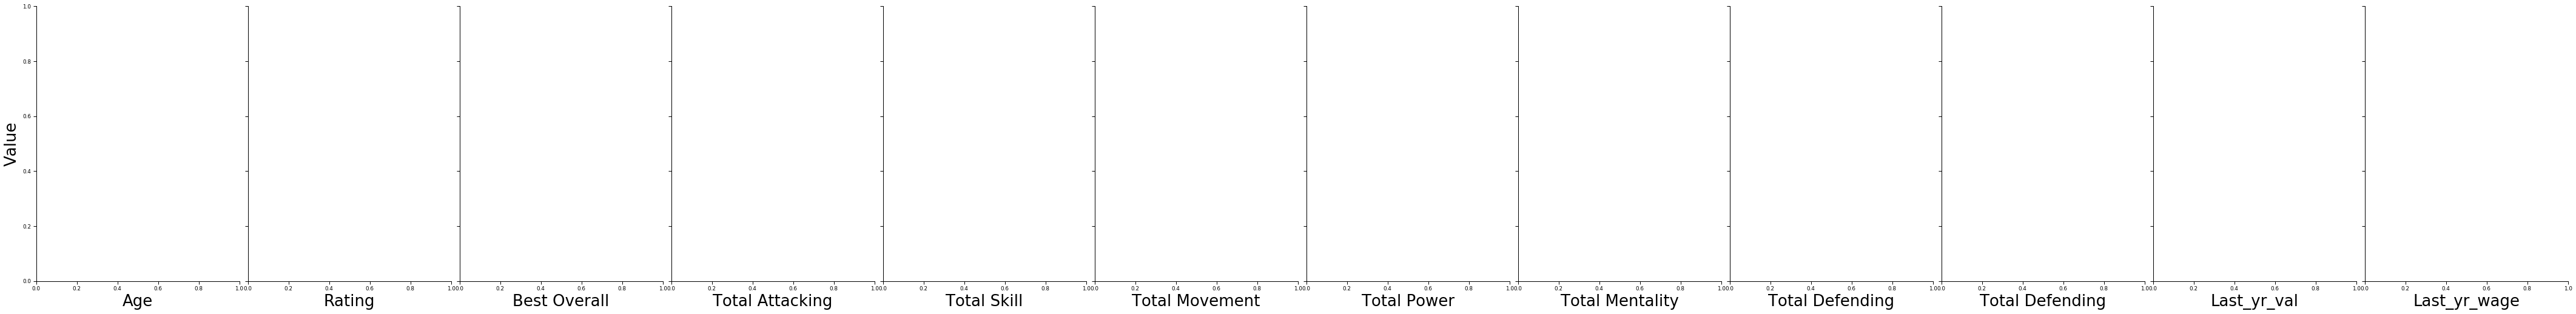

In [50]:
sns.set_context("paper", rc={"axes.labelsize":26})
sns.pairplot(players_train, x_vars=columns, y_vars=['Value'], size=7, aspect=0.7)

In [ ]:
players_train['log_value'] = np.log(players_train['Value'])
players_train['log_Last_yr_val'] = np.log(players_train['Last_yr_val'])
players_train['log_Last_yr_val'] = players_train['log_Last_yr_val'].replace([np.inf, -np.inf], 0)

In [ ]:
players_train['log_Last_yr_wage'] = np.log(players_train['Last_yr_wage'])
players_train['log_Last_yr_wage'] = players_train['log_Last_yr_wage'].replace([np.inf, -np.inf], 0)

In [ ]:
players_train.drop(['Value','Last_yr_val','Last_yr_wage'],axis=1,inplace=True)

In [ ]:
players_train

In [51]:
# Scaling the training data
from sklearn.model_selection import train_test_split

X = players_train.drop(['log_value'],axis=1)
y = players_train['log_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

In [53]:
X_test_norm = scaler.transform(X_test)

In [54]:
X_train_norm

array([[0.25806452, 0.42592593, 0.44444444, ..., 0.        , 1.        ,
        0.        ],
       [0.74193548, 0.51851852, 0.46296296, ..., 0.        , 0.        ,
        1.        ],
       [0.12903226, 0.37037037, 0.51851852, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.22580645, 0.40740741, 0.46296296, ..., 1.        , 0.        ,
        0.        ],
       [0.09677419, 0.55555556, 0.77777778, ..., 0.        , 0.        ,
        0.        ],
       [0.09677419, 0.27777778, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

### Recursive Feature Elimination

Optimal number of features : 110


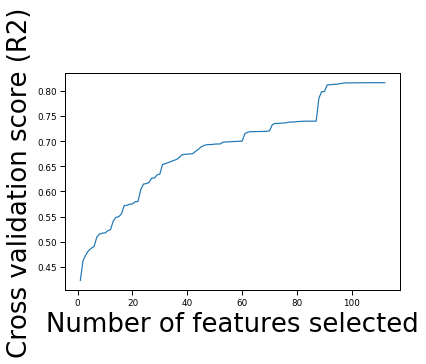

In [55]:
### Features are correlated so carrying out Feature Selection Techniques (Recursive Feature Elimination)
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
#from sklearn.linear_model import LogisticRegression


cv = KFold(n_splits=10, shuffle=True, random_state=1)
rfe_selector = RFECV(estimator=LinearRegression(), step=1, cv=cv,
              scoring='r2')
rfe_selector.fit(X_train_norm, y_train)
print("Optimal number of features : %d" % rfe_selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R2)")
plt.plot(range(1, len(rfe_selector.grid_scores_) + 1), rfe_selector.grid_scores_)
plt.show()

Text(0.5, 1.0, 'Coefficients from fitting the Lasso Model')

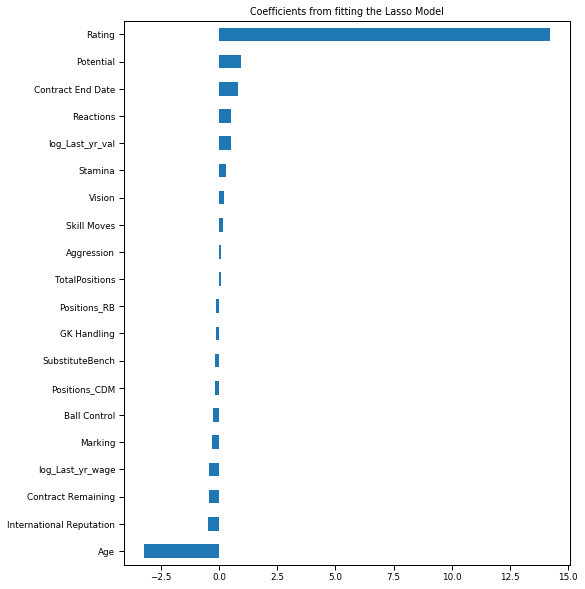

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def rmse_cv(model):
    rmse= cross_val_score(model, X_train_norm, y_train, scoring="r2", cv = 5)
    return(rmse)
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train_norm, y_train)
rmse_cv(model_lasso).mean()
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients from fitting the Lasso Model")

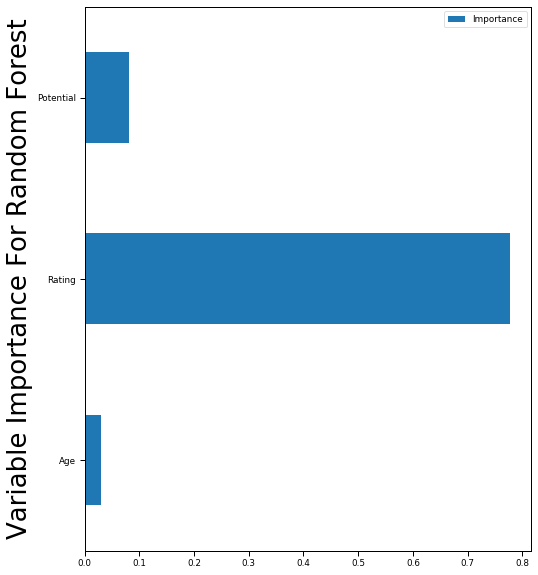

In [57]:
from sklearn.ensemble import RandomForestRegressor

embeded_rf_selector = RandomForestRegressor(n_estimators=500)
embeded_rf_selector.fit(X_train_norm, y_train)

importance = embeded_rf_selector.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])
importance[importance['Importance'] > 0.03].plot.barh()
plt.ylabel('Variable Importance For Random Forest')
plt.show()

<Figure size 576x720 with 0 Axes>

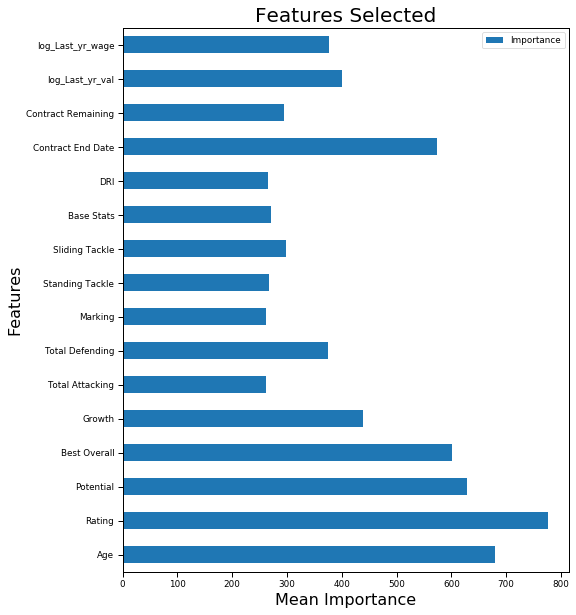

In [58]:
from lightgbm import LGBMRegressor

lgbc=LGBMRegressor(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = lgbc
embeded_lgb_selector.fit(X_train_norm, y_train)

importance = embeded_lgb_selector.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])
fig = plt.figure()
importance[importance['Importance'] > 250].plot.barh()
plt.ylabel('Features', fontsize=16)
plt.xlabel('Mean Importance', fontsize=16)
plt.title('Features Selected', fontsize=20)
plt.show()

In [59]:
### Looking at the features selected from different methods, we have following features
features = ['Age','Rating','Potential','Best Overall','Growth','Total Attacking','Total Defending','Marking','Sliding Tackle','Base Stats','Contract End Date','Contract Remaining','log_Last_yr_val','log_Last_yr_wage','Reactions','Stamina','Vision','International Reputation','Marking','Ball Control']
X_train_final = X[features]
X_train_final

,Age,Rating,Potential,Best Overall,Growth,Total Attacking,Total Defending,Marking,Sliding Tackle,Base Stats,Contract End Date,Contract Remaining,log_Last_yr_val,log_Last_yr_wage,Reactions,Stamina,Vision,International Reputation,Marking,Ball Control
0,18,84,91,83,7,352,76,16,31.0,419,2014.0,2,0.000000,0.000000,88,84,86.0,3,16,87
1,26,84,87,83,3,384,191,54,68.0,450,2015.0,3,0.000000,0.000000,84,78,86.0,3,54,88
2,23,84,88,83,4,403,191,62,63.0,453,2016.0,4,0.000000,0.000000,83,78,86.0,3,62,85
3,31,84,84,83,0,376,59,12,19.0,402,2014.0,2,0.000000,0.000000,77,53,85.0,3,12,93
4,27,84,87,83,3,347,88,23,32.0,413,2015.0,3,0.000000,0.000000,81,71,86.0,3,23,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106080,25,54,57,53,3,204,165,52,54.0,301,2019.0,1,0.000000,0.000000,53,56,39.0,1,52,40
106081,29,54,54,53,0,223,162,54,54.0,296,2020.0,2,11.002100,6.214608,48,61,46.0,1,54,53
106082,17,54,67,53,13,205,151,41,52.0,294,2020.0,2,0.000000,0.000000,53,57,37.0,1,41,53
106083,19,51,58,50,7,201,136,45,44.0,290,2020.0,2,12.388394,7.600902,46,69,41.0,1,45,46


In [60]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
X_train_norm = scaler.fit_transform(X_train_final)
#X_test_norm = scaler.transform(X_test)

In [61]:
def models(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    
    return results



In [63]:
results = models(X_train_norm,y)

In [64]:
results

,R Square Score
Linear,0.814518
Ridge,0.814513
Bagging,0.930162
RandomForest,0.937372
AdaBoost,0.777179
SVM RBF,0.877583
SVM Linear,0.778574


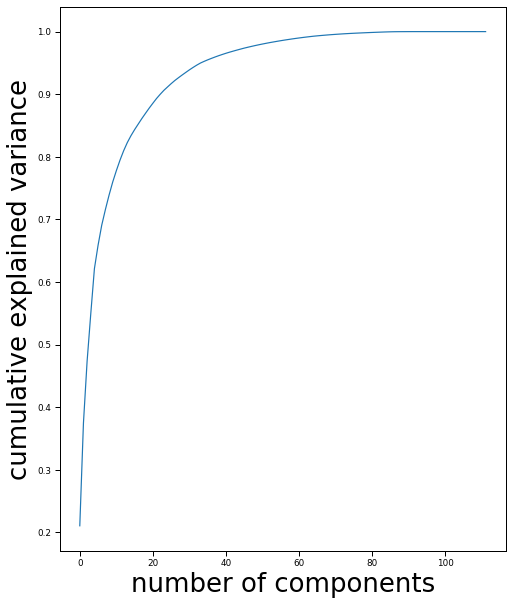

In [65]:
pca = PCA()
X_train_pca = scaler.fit_transform(X)
X_reduced = pca.fit_transform(X_train_pca)
# 10-fold CV, with shuffle
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [66]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2105334 , 0.37465746, 0.47338438, 0.54893611, 0.62132325,
       0.65870498, 0.69075555, 0.71565907, 0.73866002, 0.75964444,
       0.77785803, 0.79469763, 0.80972945, 0.8227784 , 0.83376038,
       0.84347444, 0.85242465, 0.86133199, 0.86968381, 0.87791038,
       0.88565811, 0.89320282, 0.89991187, 0.9061777 , 0.91157669,
       0.91690981, 0.92191093, 0.92637297, 0.93069398, 0.9348595 ,
       0.93897301, 0.9428225 , 0.94647318, 0.94978437, 0.95244164,
       0.95491614, 0.9572149 , 0.95944492, 0.96155066, 0.96351734,
       0.9654287 , 0.9672029 , 0.9688814 , 0.97052729, 0.972108  ,
       0.97366645, 0.97507341, 0.9764345 , 0.97775159, 0.97900782,
       0.98021041, 0.98135729, 0.98247348, 0.98351412, 0.98453094,
       0.98552463, 0.98646346, 0.98735757, 0.98823611, 0.98906698,
       0.9898582 , 0.9906276 , 0.99134324, 0.99203445, 0.99269238,
       0.9932592 , 0.99378644, 0.99427999, 0.99476645, 0.99522509,
       0.99563474, 0.99603271, 0.99641552, 0.99675809, 0.99707

In [67]:
pca = PCA(n_components=25)
X_train_pca = scaler.fit_transform(X)
X_reduced = pca.fit_transform(X_train_pca)

In [68]:
## PCA shows around 25 components explain 90% of the variation in data
results_PCA = models(X_reduced,y)
results_PCA

,R Square Score
Linear,0.709874
Ridge,0.709874
Bagging,0.787387
RandomForest,0.809488
AdaBoost,0.506933
SVM RBF,0.829838
SVM Linear,0.694829


In [69]:
## Hyperparameter tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 55, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [70]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring="neg_mean_squared_error")
rf_random.fit(X_train_norm,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 102.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 211.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
cv_results = rf_random.cv_results_
rf_results = pd.DataFrame()
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    rf_results = rf_results.append({'score' : np.sqrt(-mean_score),'params': params},ignore_index=True)

In [72]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, min_samples_leaf=2, n_estimators=500)

In [83]:
pd.set_option('display.max_colwidth', -1)
index = rf_results['score'].idxmin()
display(rf_results[rf_results.index == index]['params'])

46    {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 45, 'bootstrap': True}
Name: params, dtype: object

In [85]:
# Not much of an improvement after performing Hyperparameter tuning as well
cv = KFold(n_splits=10,shuffle=True,random_state=45)
r2 = make_scorer(r2_score)
r2_val_score = cross_val_score(rf_random.best_estimator_, X_train_norm,y, cv=cv,scoring=r2)
scores=[r2_val_score.mean()]
print(scores)

[0.939684824224835]


#### Testing on Random Forest Regressor

In [90]:
players_test = pd.read_csv(r'test_data.csv')
players_test

,Unnamed: 0,Year,Name,Age,Rating,Potential,Team,ID,Height,Weight,Foot,Best Overall,Best Position,Growth,Value,Wage,Release Clause,Total Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Total Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Total Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Total Power,Short Power,Jumping,Stamina,Strength,Long Shots,Total Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total Defending,Marking,Standing Tackle,Sliding Tackle,Total GK,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot,Skill Moves,Attacking Work Rate,Defensive Work Rate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,TotalPositions,Position 1,Position 2,Position 3,Position 4,Contract Start Date,Contract End Date,Contract Remaining,Category,MinutesPlayed,Appearances,Lineups,SubstituteIn,SubstituteOut,SubstituteBench,Goal,YellowCard,RedCard,GoalPerAppearance,MinutesPlayedPErAppearance,Last_yr_val,Last_yr_wage
0,10686,2019,L. Messi,31,94,94,FC Barcelona,158023,170.2,159,Left,94,CAM,0,1105000000,575000,2265000000,429,86,95,70,92,86.0,469,97,93.0,94,89,96,460,91,86,93.0,95,95.0,385,85,68.0,72,66,94,333,48,22,94,94.0,75,96.0,87,33,28,26.0,54,6,11,15,14,8,2217,462,4,4,Medium,Low,5,88,91,91,96,32,64,3,CF,RW,ST,NaN,2004,2021.0,2,Midfielder,2709.0,34.0,29.0,5.0,1.0,5.0,36.0,3.0,0.0,1.058824,79.676471,1185000000,575000
1,10687,2019,K. De Bruyne,27,91,91,Manchester City,192985,180.3,154,Right,89,CAM,0,93000000,350000,1721000000,404,93,82,55,92,82.0,436,86,85.0,83,91,91,401,78,76,79.0,91,77.0,408,91,63.0,89,75,90,397,76,61,87,94.0,79,90.0,177,68,58,51.0,56,15,13,5,10,13,2279,481,5,4,High,High,4,77,86,92,87,61,78,2,CAM,CM,NaN,NaN,2015,2023.0,4,Midfielder,974.0,19.0,11.0,8.0,7.0,9.0,2.0,2.0,0.0,0.105263,51.263158,1045000000,400000
2,10688,2019,E. Hazard,27,91,91,Chelsea,183277,172.7,168,Right,90,CAM,0,93000000,325000,1721000000,395,81,84,61,89,80.0,434,95,83.0,79,83,94,461,94,88,95.0,90,94.0,368,82,56.0,84,66,80,357,54,41,87,89.0,86,91.0,83,34,27,22.0,45,11,12,6,8,8,2143,457,4,4,High,Medium,4,91,83,86,94,35,68,2,LW,CF,NaN,NaN,2012,2020.0,1,Midfielder,2926.0,37.0,32.0,5.0,8.0,5.0,16.0,2.0,0.0,0.432432,79.081081,955000000,400000
3,10689,2019,David Silva,32,90,90,Manchester City,168542,172.7,148,Left,88,CAM,0,60000000,275000,111000000,388,84,75,54,93,82.0,427,89,82.0,77,85,94,405,70,64,91.0,90,90.0,334,72,64.0,76,48,74,363,57,50,89,92.0,75,93.0,141,59,53,29.0,46,6,15,7,6,12,2104,431,2,4,High,Medium,4,67,75,88,91,52,58,2,CAM,CM,NaN,NaN,2010,2020.0,1,Midfielder,2411.0,33.0,28.0,5.0,15.0,7.0,6.0,3.0,0.0,0.181818,73.060606,585000000,275000
4,10690,2019,P. Dybala,24,89,94,Juventus,211110,177.8,165,Left,87,CAM,5,89000000,200000,1535000000,407,82,82,68,87,88.0,437,92,88.0,88,77,92,432,87,83,91.0,86,85.0,390,82,75.0,80,65,88,337,48,32,84,87.0,86,84.0,63,23,20,20.0,26,5,4,4,5,8,2092,439,3,4,Medium,Medium,3,85,84,85,91,28,66,2,CAM,RW,NaN,NaN,2015,2022.0,3,Midfielder,2137.0,30.0,24.0,6.0,6.0,9.0,5.0,2.0,0.0,0.166667,71.233333,89000000,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33451,199101,2020,L. Klassen,19,58,75,TSV 1860 München,244181,172.7,152,Left,60,LWB,17,250000,500,519000,225,59,39,39,59,29.0,241,59,39.0,31,49,63,349,75,71,73.0,49,81.0,262,40,72.0,67,51,32,220,57,49,41,41.0,32,52.0,156,50,51,55.0,46,10,9,6,10,11,1499,331,3,2,High,Medium,1,73,37,52,62,50,57,2,LB,LM,NaN,NaN,2018,2020.0,0,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
33452,199102,2020,J. King,18,58,75,Sydney FC,246005,177.8,150,Left,60,LWB,17,240000,500,450000,202,52,27,39,56,28.0,217,56,26.0,30,50,55,331,76,71,65.0,50,69.0,255,29,

In [91]:
players_test = players_test.replace(np.NaN,0)
players_test = players_test.replace([np.inf, -np.inf], 0)

In [92]:
for col in changeTypeToCategory:
    players_test[col] = players_test[col].astype('category')
players_test = pd.get_dummies(players_test, columns=["Foot", "Best Position","Position 1","Category"], prefix=["Foot", "BestPosition","Positions","Category"])
players_test["Attacking Work Rate"] = players_test["Attacking Work Rate"].replace(ordered_work_rate)
players_test["Defensive Work Rate"] = players_test["Defensive Work Rate"].replace(ordered_work_rate)
players_test['log_value'] = np.log(players_test['Value'])
players_test['log_Last_yr_val'] = np.log(players_test['Last_yr_val'])
players_test['log_Last_yr_val'] = players_test['log_Last_yr_val'].replace([np.inf, -np.inf], 0)
players_test['log_Last_yr_wage'] = np.log(players_test['Last_yr_wage'])
players_test['log_Last_yr_wage'] = players_test['log_Last_yr_wage'].replace([np.inf, -np.inf], 0)
X_test = players_test.drop(['log_value'],axis=1)
y_test = players_test['log_value']
X_test_final = X_test[features]

In [94]:
X_test_final

,Age,Rating,Potential,Best Overall,Growth,Total Attacking,Total Defending,Marking,Sliding Tackle,Base Stats,Contract End Date,Contract Remaining,log_Last_yr_val,log_Last_yr_wage,Reactions,Stamina,Vision,International Reputation,Marking,Ball Control
0,31,94,94,94,0,429,87,33,26.0,462,2021.0,2,20.893009,13.262125,95,72,94.0,5,33,96
1,27,91,91,89,0,404,177,68,51.0,481,2023.0,4,20.767283,12.899220,91,89,94.0,4,68,91
2,27,91,91,90,0,395,83,34,22.0,457,2020.0,1,20.677222,12.899220,90,84,89.0,4,34,94
3,32,90,90,88,0,388,141,59,29.0,431,2020.0,1,20.187122,12.524526,90,76,92.0,4,59,94
4,24,89,94,87,5,407,63,23,20.0,439,2022.0,3,18.304147,12.206073,86,80,87.0,3,23,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33451,19,58,75,60,17,225,156,50,55.0,331,2020.0,0,0.000000,0.000000,49,67,41.0,1,50,63
33452,18,58,75,60,17,202,163,55,52.0,321,2020.0,0,11.512925,6.907755,50,76,38.0,1,55,55
33453,22,57,68,58,11,218,166,52,56.0,317,2020.0,0,0.000000,0.000000,55,65,40.0,1,52,50
33454,23,57,62,59,5,197,164,55,56.0,327,2020.0,0,11.982929,6.214608,45,74,52.0,1,55,55


In [97]:
X_test_norm = scaler.transform(X_test_final)

ValueError: operands could not be broadcast together with shapes (33456,20) (112,) (33456,20) 